# SEP Spectra Tool
This tool loads energetic particle data and determines an energy spectrum, which is plotted and can be saved as .csv file. 

You can choose between a peak spectrum or a time-integrated spectrum.
An optional pre-event background subtraction can be applied.

At the end of the notebook, you can determine integral spectra for time slices of a given duration over a chosen time interval

In [1]:
# load libraries
import os
import datetime as dt
import pandas as pd
import numpy as np
from spectra import Event
import spectra.widgets as w
from seppy.util import jupyterhub_data_path
from IPython.display import Image, display, HTML

# Select spacecraft, instrument, and particle species

In [2]:
display(w.spacecraft_drop, w.sensor_drop, w.view_drop, w.species_drop)

Dropdown(description='Spacecraft:', index=2, options=('PSP', 'SOHO', 'Solar Orbiter', 'STEREO-A', 'STEREO-B', …

Dropdown(description='Sensor:', options=('EPT', 'HET'), value='EPT')

Dropdown(description='Viewing:', options=('sun', 'asun', 'north', 'south'), value='sun')

Dropdown(description='Species:', options=('ions', 'electrons'), value='ions')

# Define time intervals for data loading and background subtraction 

In [12]:
# Define period for data loading; the format is (year, month, day, hour, minute, second), with hour, minute, and second optional
startdate = dt.datetime(2021, 10, 28,9)
enddate = dt.datetime(2021, 10, 29, 20)

# choose if background subtraction is used and define background interval, if True
subtract_background = True
background_start = dt.datetime(2021, 10, 28, 12)
background_end = dt.datetime(2021, 10, 28, 15)   

# Provide time interval for the spectum derivation and choose spectral type (peak or integral spectrum)

In [17]:
spectral_type = 'integral'  # 'integral' or 'peak'

# interval for spectral integration or peak search:
spec_start = dt.datetime(2021, 10, 28, 15)
spec_end = dt.datetime(2021, 10, 29, 9)

### Load the data and choose time averaging


In [14]:
# Set your local path where you want to save the data files. If you run this on the project's JupyterHub server, don't change. 
data_path = f"{os.getcwd()}{os.sep}data"
data_path = jupyterhub_data_path(data_path)

# Choose the time averaging (resampling). This is used for the time series plots and will affect the spectrum if spectral_type == 'peak'
resample = '5min'  # for example: '5min', '60s'

E = Event()
E.load_data(w.spacecraft_drop.value, w.sensor_drop.value, w.species_drop.value, startdate, enddate, w.view_drop.value, resample, data_path)


Multi-index function only available (and necessary) for pitch-angle resolved fluxes. Skipping.


### Plot intensity-time series to tune the chosen time intervals
#### (If you want to change the time intervals, go back to the respective cell above)

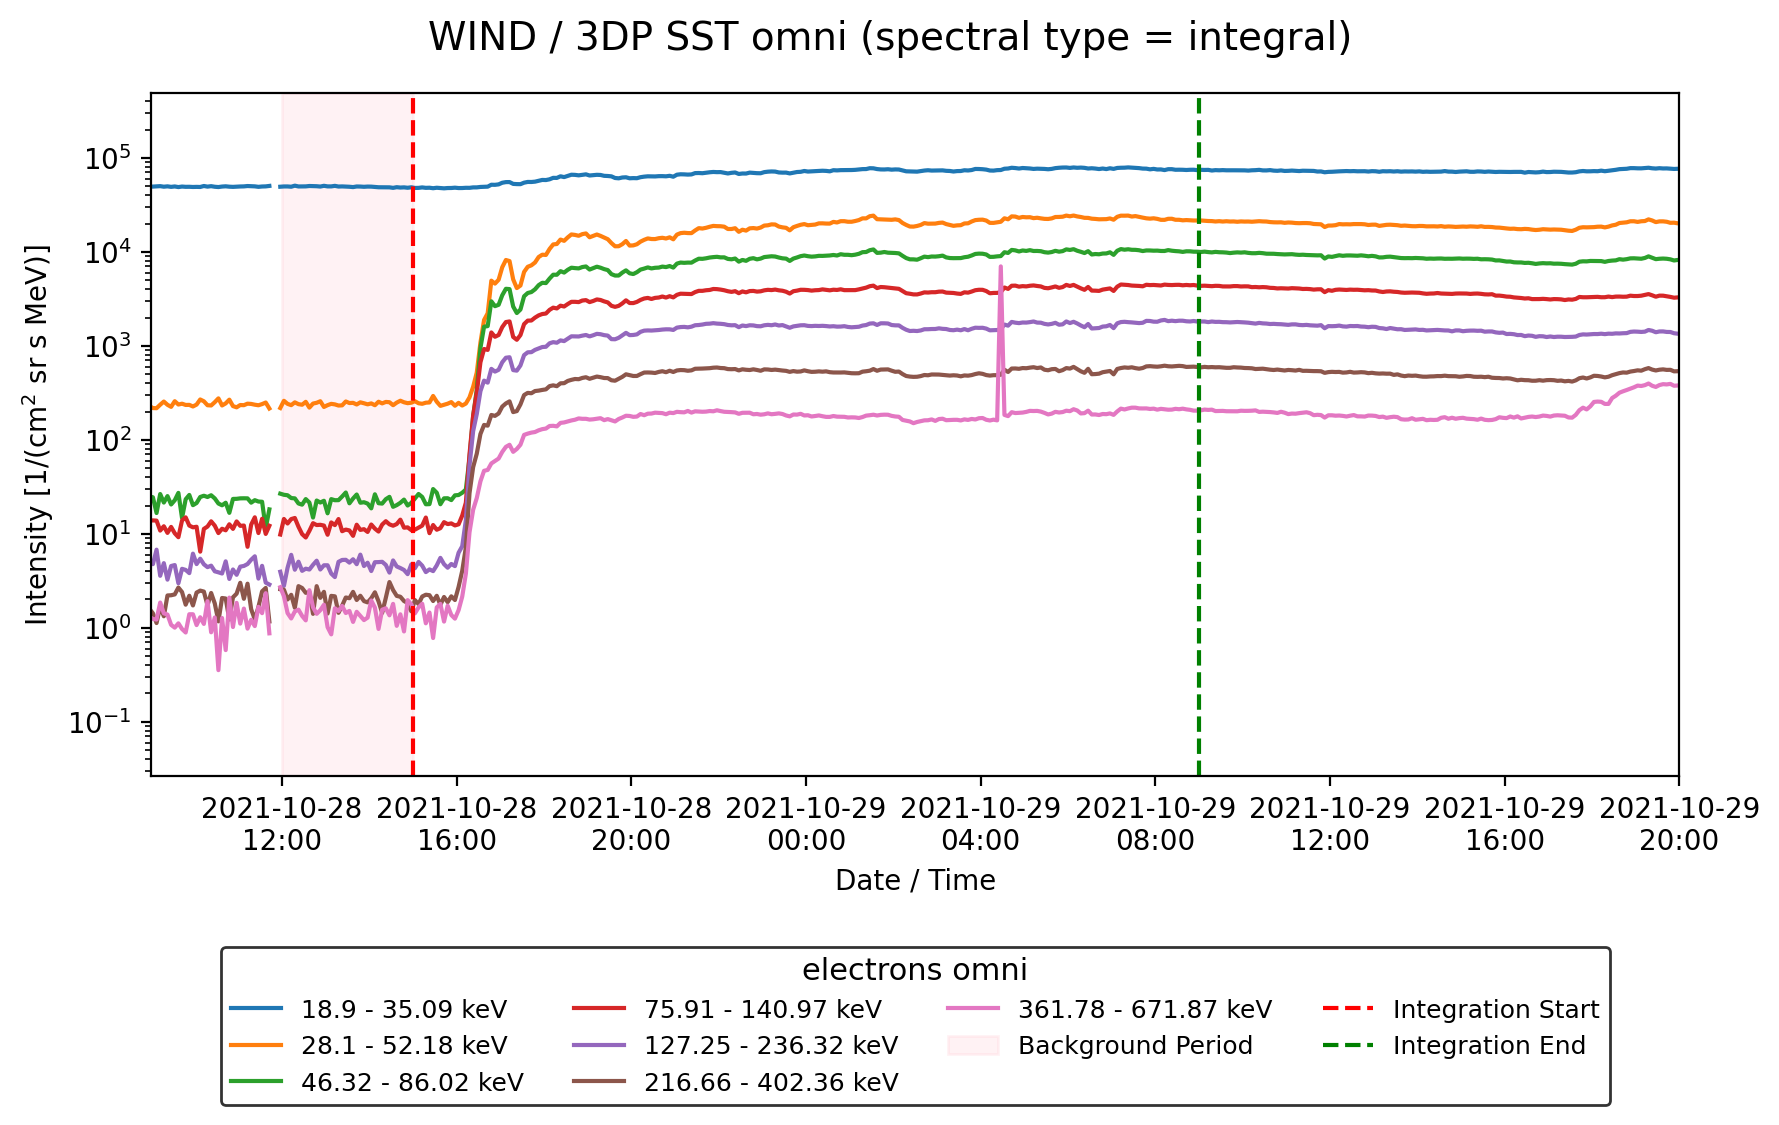

In [18]:
fig_ts, ax_ts = E.plot_flux(spec_start, spec_end, subtract_background=subtract_background, background_start=background_start, background_end=background_end, savefig=False, spec_type=spectral_type)

## Determine and plot spectrum
### Save the spectrum plot by using savefig=True

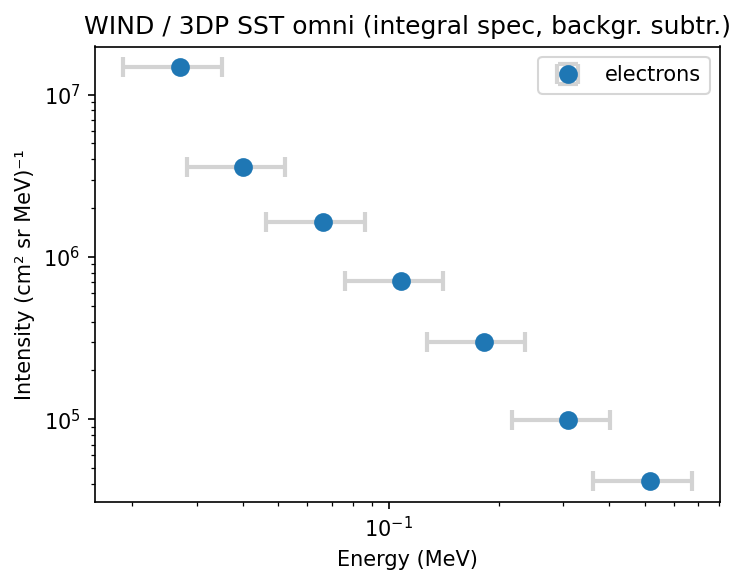

In [19]:
E.get_spec(spec_start, spec_end, spec_type=spectral_type, subtract_background=subtract_background, background_start=background_start, background_end=background_end)

fig, ax = E.plot_spectrum(savefig=False)

# Save spectrum data file as .csv

In [20]:
foldername = f'output_spectra{os.sep}'
filename = f'{foldername}spectrum_{spectral_type}_{E.spacecraft.upper()}_{E.instrument.upper()}_{E.viewing}_{E.species}.csv'

E.spec_df.to_csv(filename, index=False)

# Spectral temporal evolution
### Here you can determine the spectra for time slices of a custom duration over a longer period

### First, determine time interval and duration for spectra slices and show in time series plot:

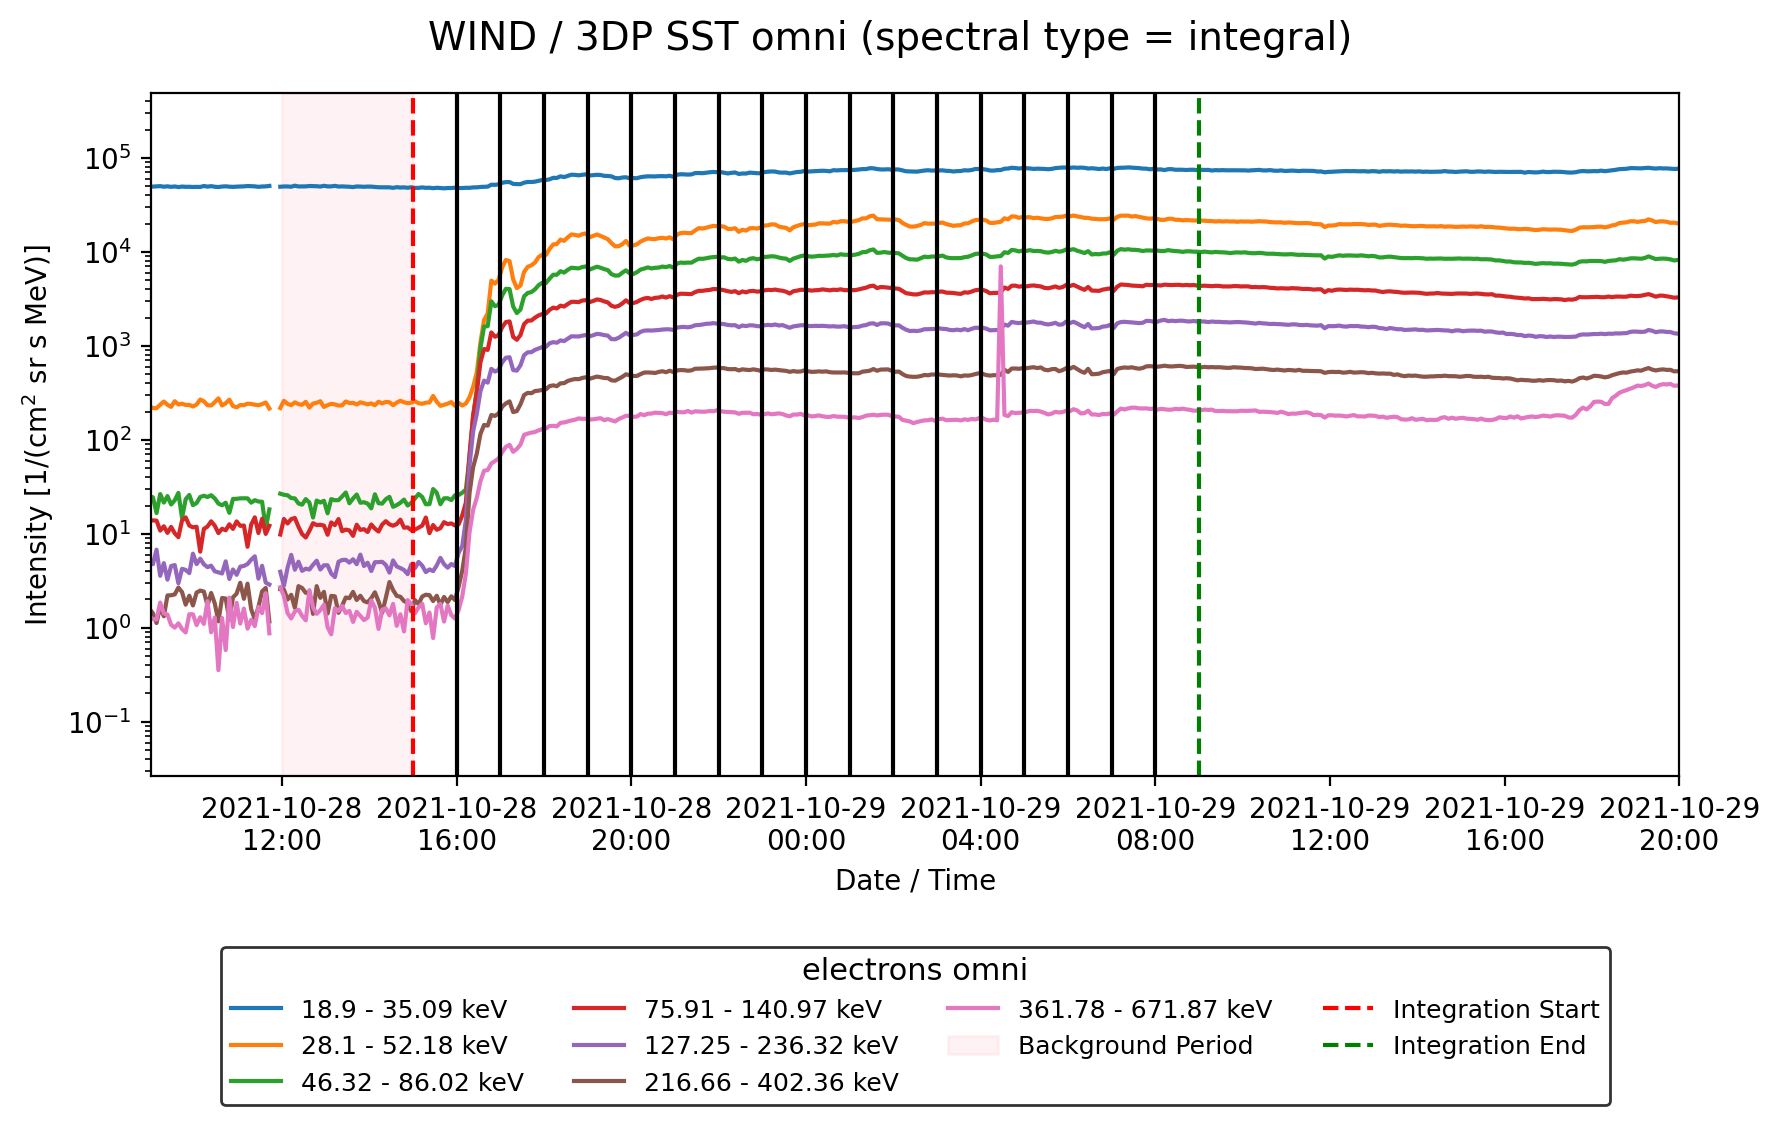

In [21]:
interval_start = spec_start
interval_end = spec_end
duration = pd.Timedelta(hours=1) # add other examples (10min etc); make code easier with clear input by the user
num_steps = int((interval_end-interval_start) / duration)

for i in np.arange(1, num_steps, 1): 
    time = interval_start + i * duration
    ax_ts.axvline(time, color='k')
    
fig_ts

# Determine spectra for each time slice and save output (.csv and .png)
This creates also an animated gif out of all spectra  (run next cell to watch the animation)

Output files are saved in the output_spectra/ folder

Global y-range: 17.16 to 932126.25


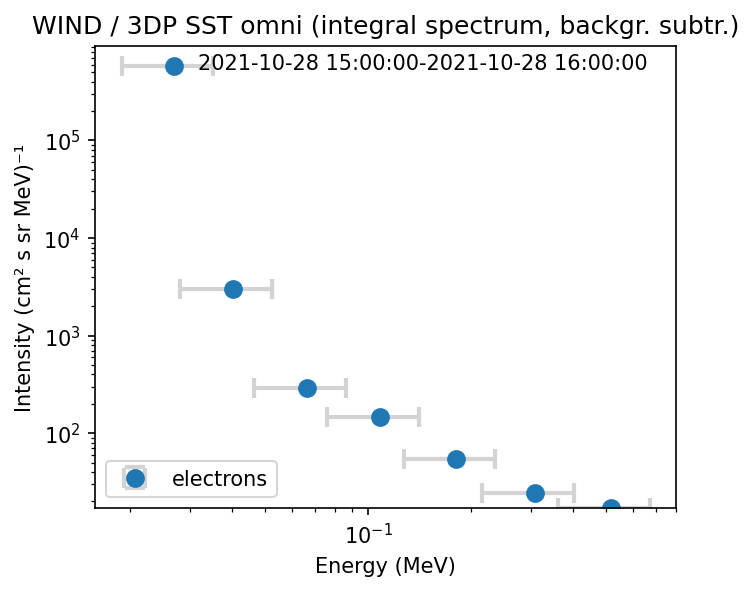

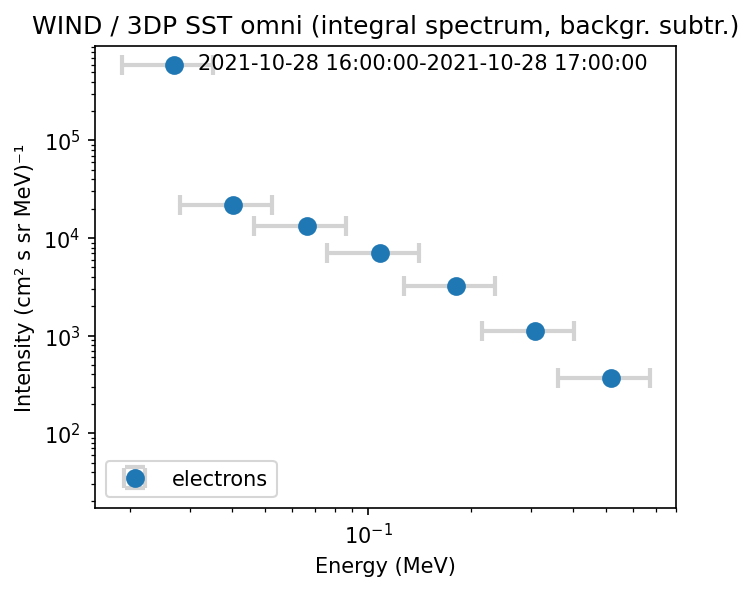

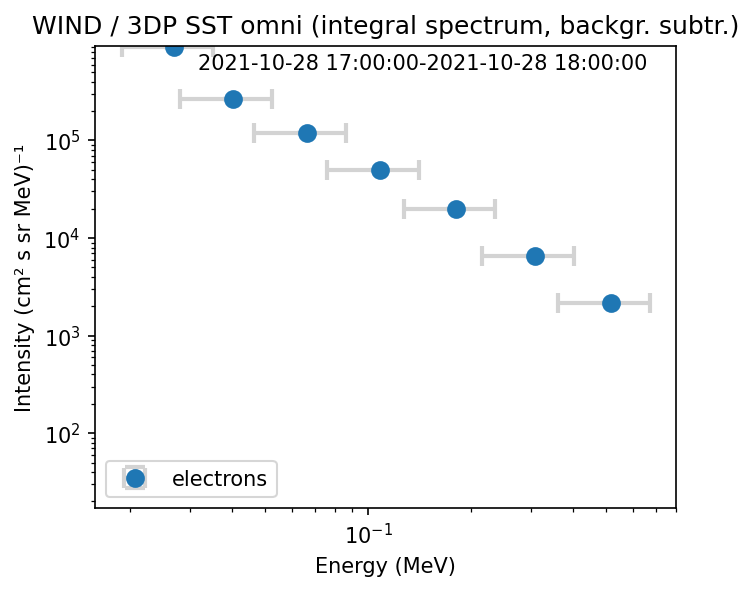

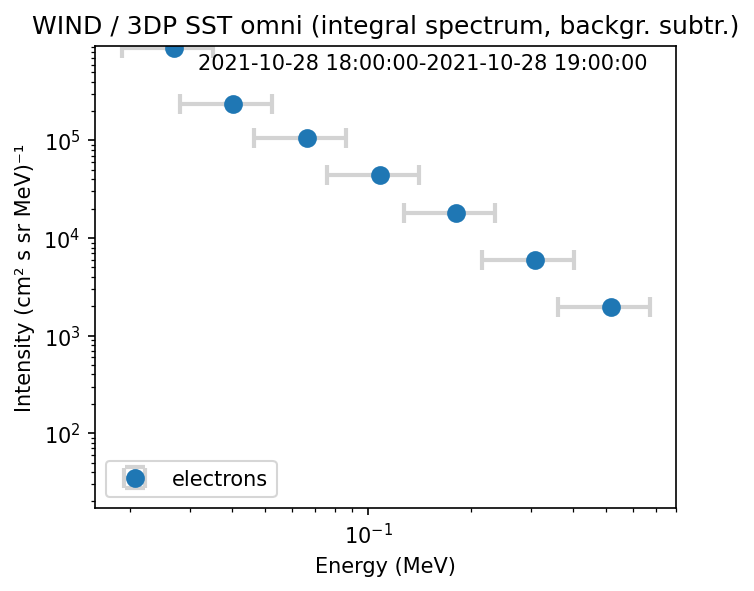

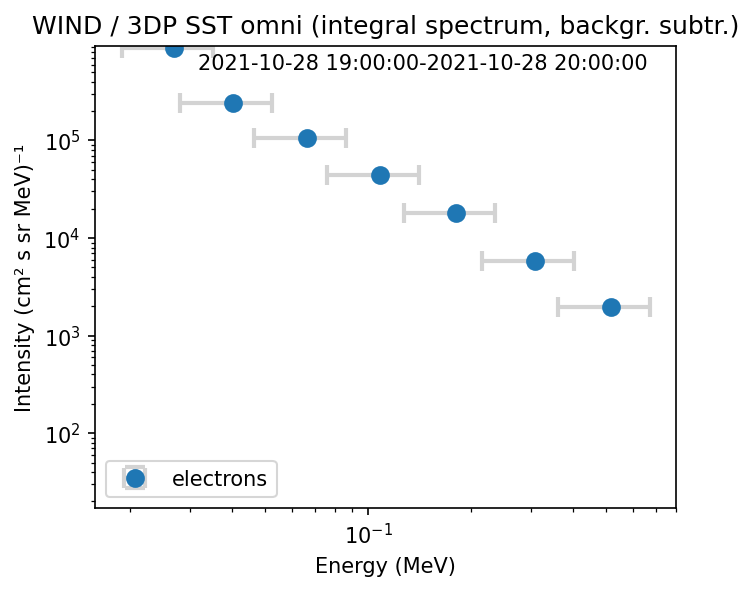

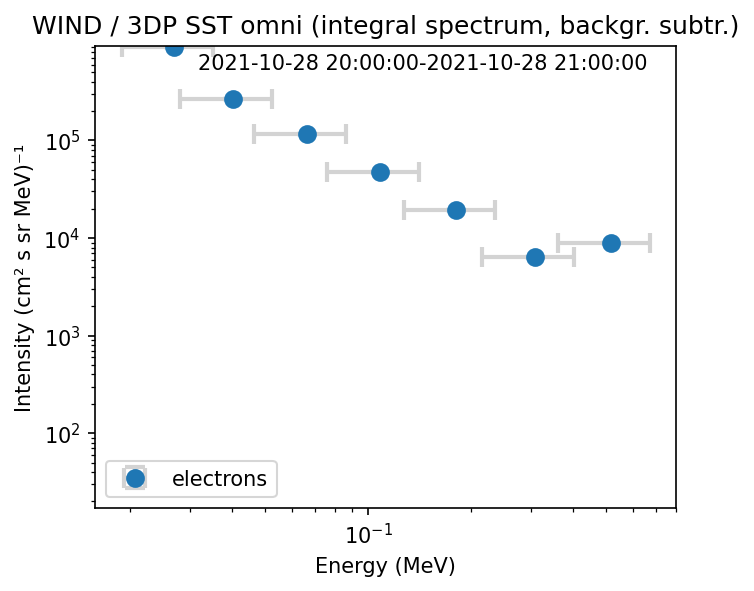

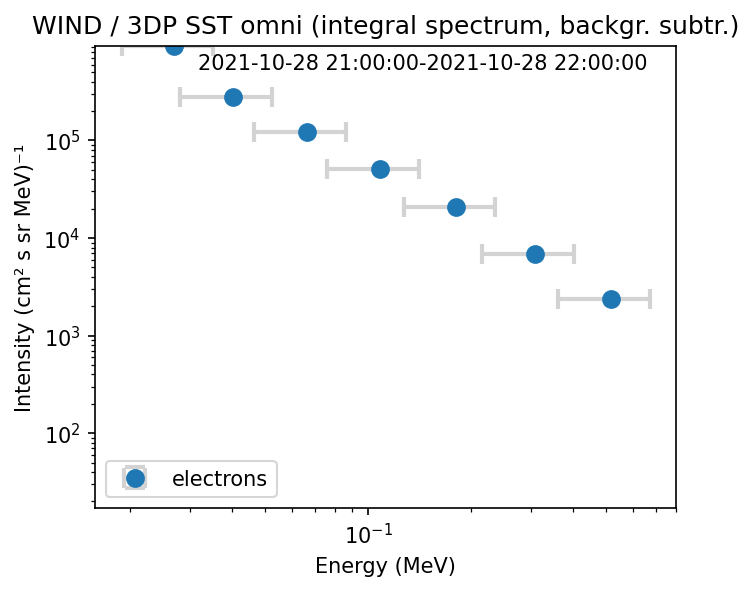

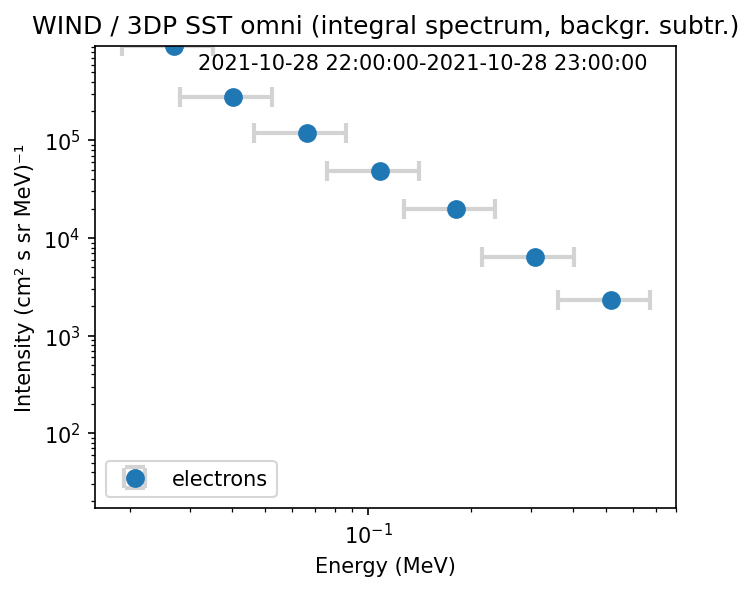

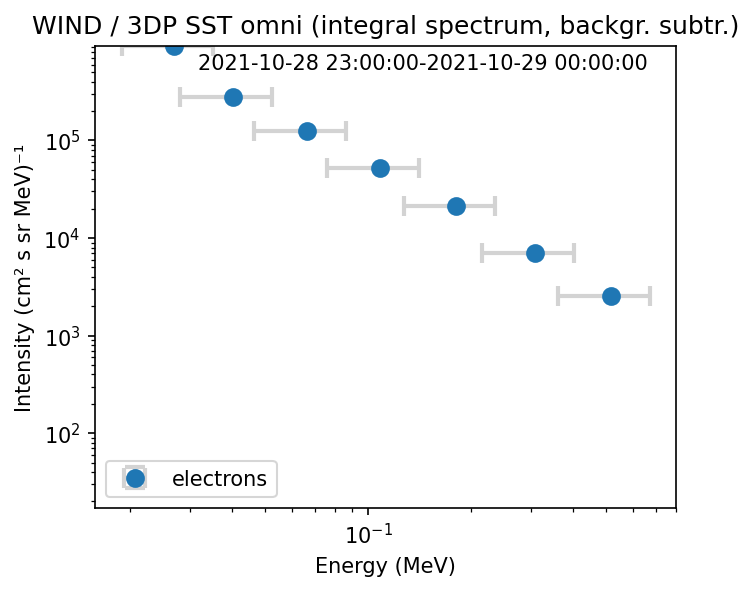

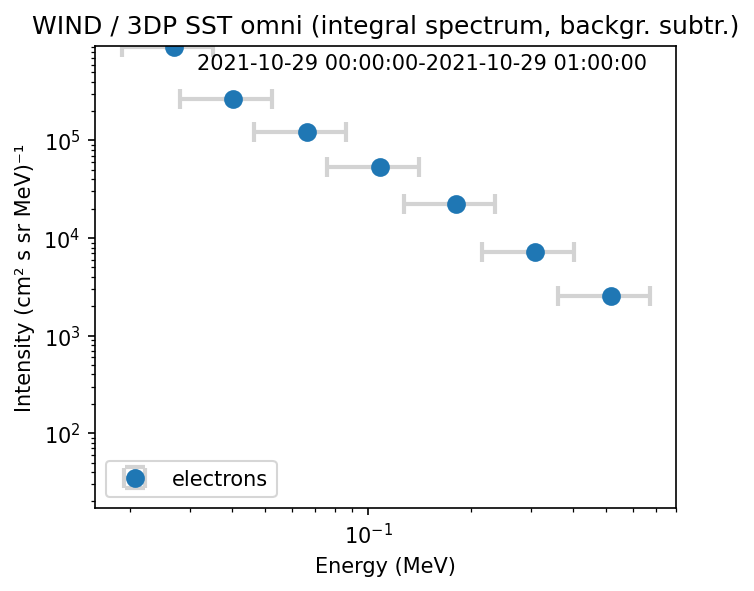

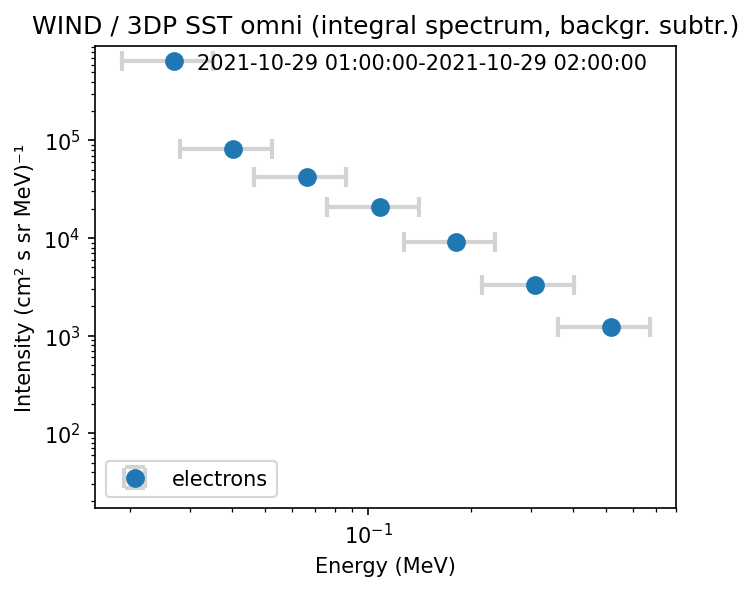

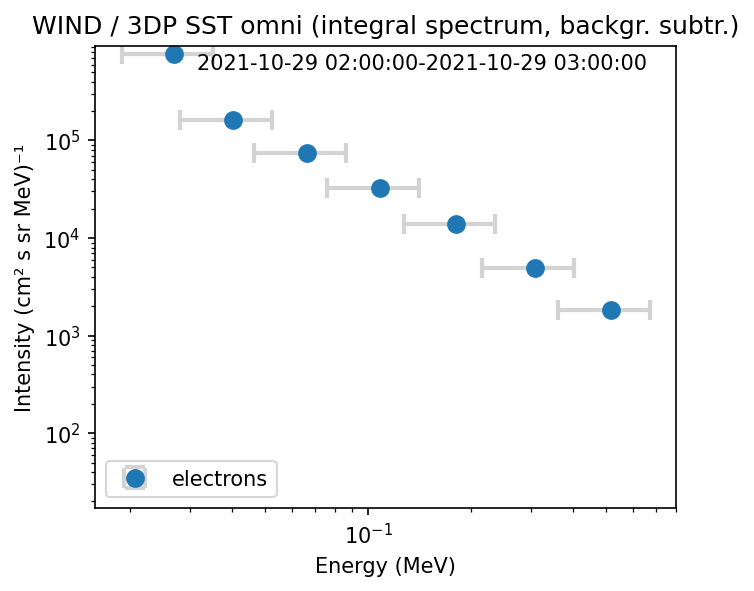

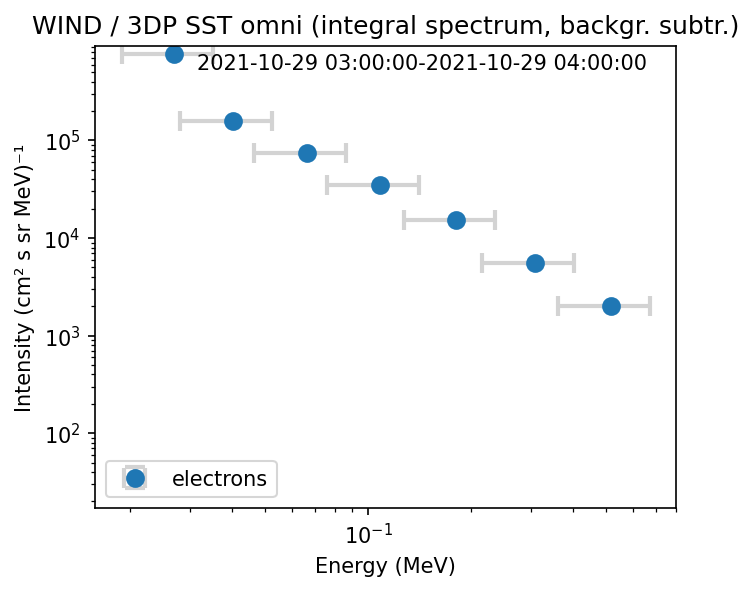

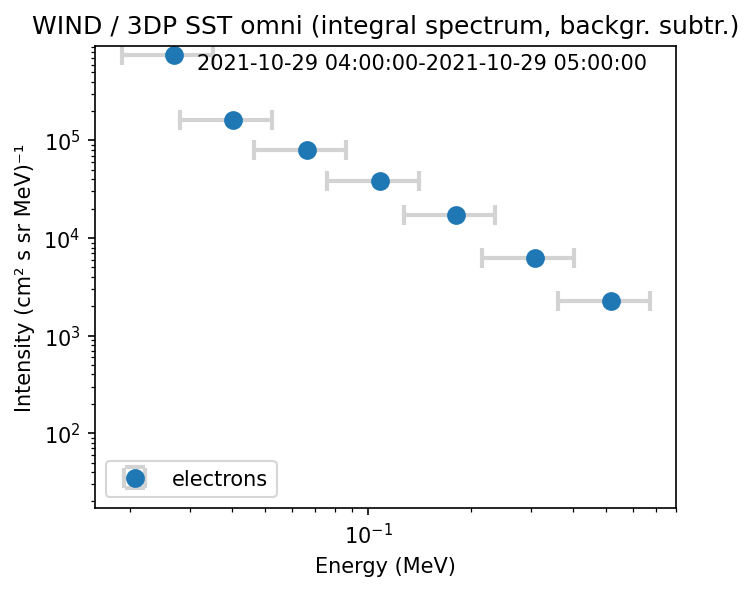

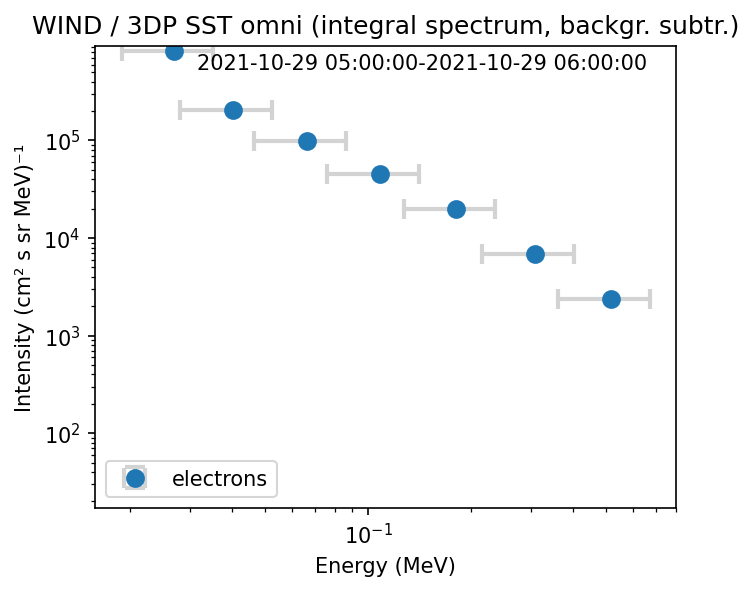

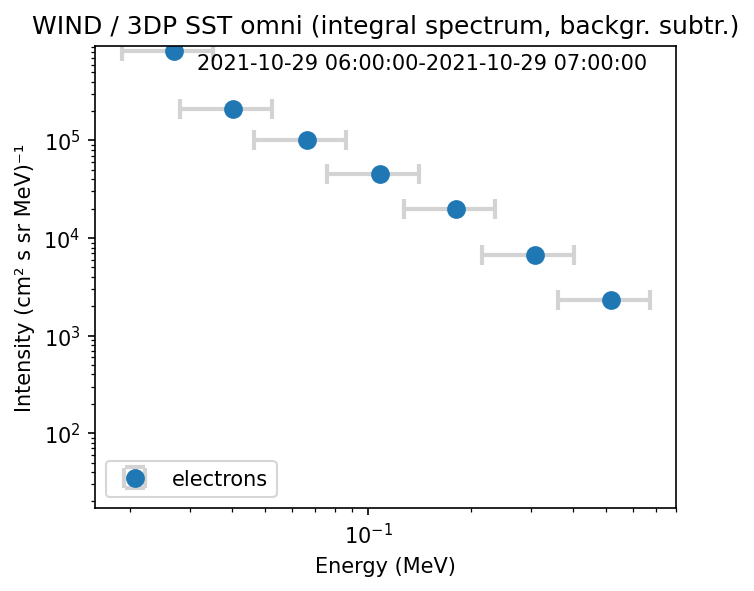

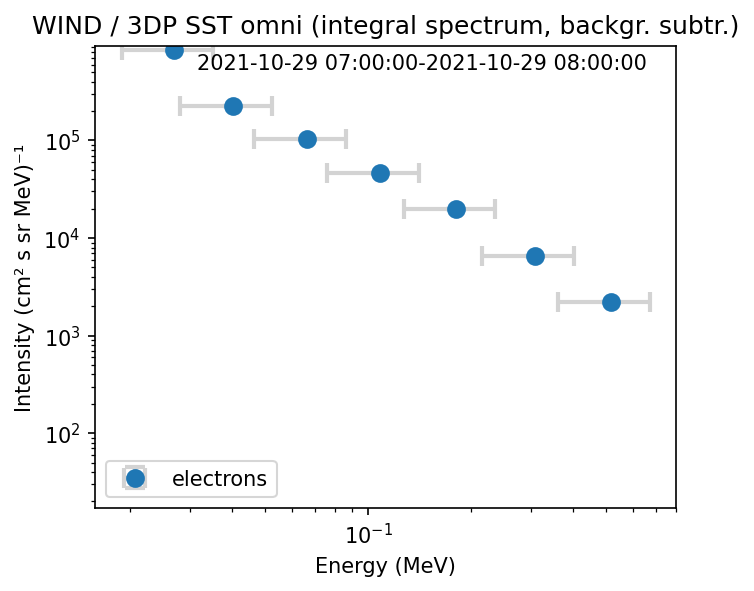

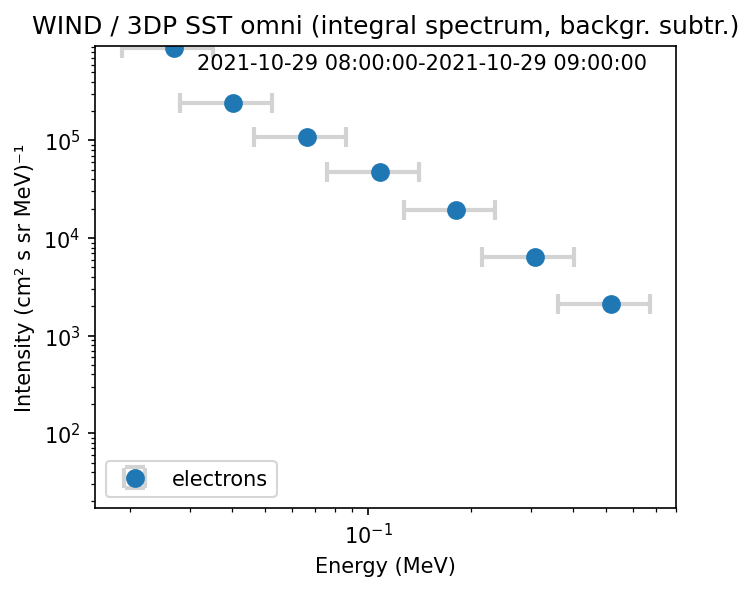

In [22]:
E.get_spec_slices(interval_start, interval_end, duration, subtract_background=subtract_background, background_start=background_start, background_end=background_end)

# Display the gif from all spectra slice plots

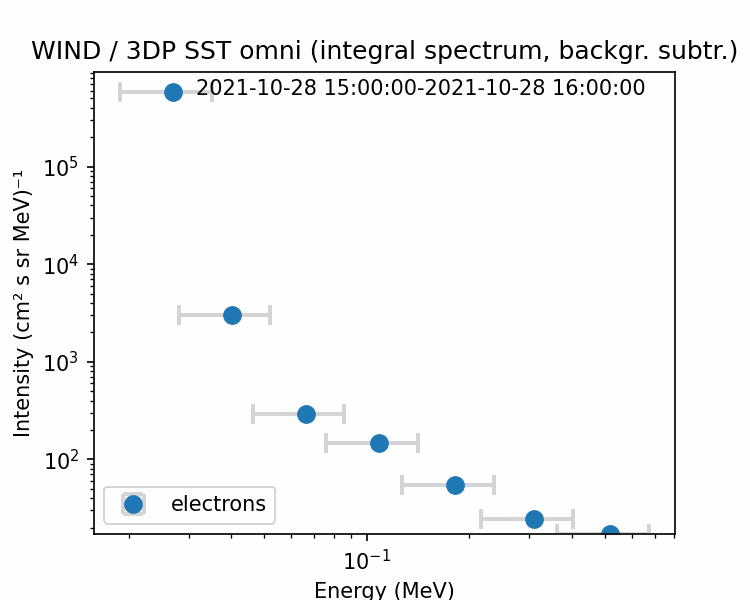

In [ ]:
gif_path = E.gif_filename
gif = Image(filename=gif_path)
display(gif)

### Saving figures

You can usually save a figure from the Notebook by right-clicking on it while holding down the ⇧ Shift key, then select "Save Image As..." (or similar).